In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
print(os.listdir("../input"))

In [ ]:
train_data = pd.read_csv("../input/sign_mnist_train.csv")
validation_data = pd.read_csv("../input/sign_mnist_test.csv")

In [ ]:
train_data.shape

In [ ]:
train_data.head()

In [ ]:
train_label_data = train_data["label"].values
train_label_class = np.unique(np.array(train_label_data))
train_label_data.shape

In [ ]:
test_label_data = validation_data["label"].values
test_label_class = np.unique(np.array(test_label_data))
test_label_data.shape


In [ ]:
plt.figure(figsize=(18,10))
sns.countplot(x=train_label_data)

In [ ]:
train_data.drop("label", axis=1, inplace=True)


In [ ]:
validation_data.drop("label", axis=1, inplace=True)

In [ ]:
train_image_data = train_data.values
train_image_data

In [ ]:
test_image_data = validation_data.values
test_image_data

In [ ]:
plt.imshow(test_image_data[0].reshape(28,28))

In [ ]:
train_images = np.array([train_image_data[i].reshape(28,28) for i in range(train_image_data.shape[0])])

In [ ]:
test_images = np.array([test_image_data[i].reshape(28,28) for i in range(test_image_data.shape[0])])

In [ ]:
print(train_images.shape)
print(test_images.shape)
print(train_label_data.shape)
print(test_label_data.shape)

In [ ]:
data = np.concatenate((train_images,test_images), axis=0)

In [ ]:
data.shape

In [ ]:
labels = np.concatenate((train_label_data, test_label_data), axis=0)
labels.shape

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.22, random_state = 101)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
training_images = np.expand_dims(x_train, axis=3)
testing_images = np.expand_dims(x_test, axis=3)

In [ ]:
training_images.shape

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit_generator(train_datagen.flow(training_images,y_train,batch_size=32),
                   steps_per_epoch = len(training_images)/32,
                   epochs=15,
                   validation_data = validation_datagen.flow(testing_images, y_test, batch_size=32),
                   validation_steps = len(testing_images)/32)

In [ ]:
model.evaluate(testing_images, y_test)

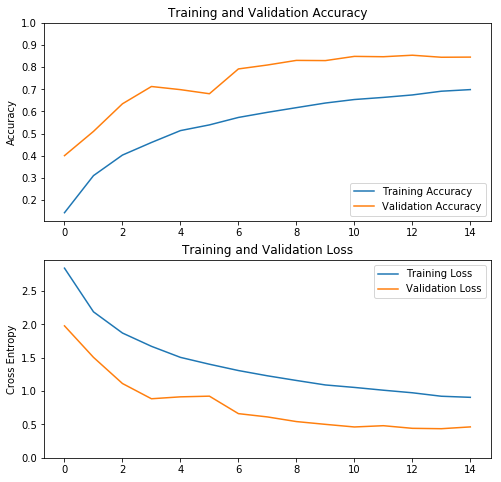

In [136]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()